In [2]:
import numpy as np
import pandas as pd
from pathlib import Path

%matplotlib inline
from matplotlib import pyplot as plt

from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix





In [4]:
# Import the data
# displaying dataframe to confirm data read properly

loan_risk = pd.read_csv('Resources/lending_data.csv')
loan_risk.head()

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt,loan_status
0,10700.0,7.672,52800,0.431818,5,1,22800,0
1,8400.0,6.692,43600,0.311927,3,0,13600,0
2,9000.0,6.963,46100,0.349241,3,0,16100,0
3,10700.0,7.664,52700,0.430740,5,1,22700,0
4,10800.0,7.698,53000,0.433962,5,1,23000,0


In [5]:
loan_risk.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77536 entries, 0 to 77535
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   loan_size         77536 non-null  float64
 1   interest_rate     77536 non-null  float64
 2   borrower_income   77536 non-null  int64  
 3   debt_to_income    77536 non-null  float64
 4   num_of_accounts   77536 non-null  int64  
 5   derogatory_marks  77536 non-null  int64  
 6   total_debt        77536 non-null  int64  
 7   loan_status       77536 non-null  int64  
dtypes: float64(3), int64(5)
memory usage: 4.7 MB


In [6]:
loan_risk.isnull().sum()

loan_size           0
interest_rate       0
borrower_income     0
debt_to_income      0
num_of_accounts     0
derogatory_marks    0
total_debt          0
loan_status         0
dtype: int64

To predict model performance: 
I feel logistic regression model will perform better as it works better with smaller datasets, having less noisy parameters to confuse it and this seems like a smaller dataset. It performs better when the noise variables are less than or equal to the explanatory variables and in this dataset tjhe columns seems to have a good relevance to the credit score 

LogisticRegression model

Split data into train and test
Train Logistic Regression model
Train Random Forest Classifier model

In [8]:
X=loan_risk.drop('loan_status',axis=1)
y=loan_risk['loan_status'].values

In [9]:
sample_hold = 42

In [10]:
# Split the data into X_train, X_test, y_train, y_test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=sample_hold)

In [14]:
X_train.head()

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt
63243,8900.0,6.893,45500,0.340659,3,0,15500
36991,9000.0,6.932,45800,0.344978,3,0,15800
39985,8900.0,6.896,45500,0.340659,3,0,15500
63047,9000.0,6.961,46100,0.349241,3,0,16100
49913,8400.0,6.712,43800,0.315068,3,0,13800


In [15]:
# Create a StandardScaler model and fit it to the training data
X_scaler = StandardScaler()
X_scaler.fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [21]:
classifier = LogisticRegression()
classifier

LogisticRegression()

In [22]:
logistic_regression = classifier.fit(X_train, y_train)

In [23]:
print(f"Training Data Score:{logistic_regression.score(X_train, y_train)}")

print(f"Testing Data Score:{logistic_regression.score(X_test, y_test)}")

Training Data Score:0.9919177328380795
Testing Data Score:0.9924680148576145


In [24]:
y_true = y_test

y_pred = classifier.predict(X_test)

confusion_matrix(y_true, y_pred)

array([[18699,    93],
       [   53,   539]], dtype=int64)

In [25]:
tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()

accuracy = (tp + tn) / (tp + fp + tn + fn) # (563 + 18663) / (563 + 102 + 18663 + 56)

print(f"Accuracy: {accuracy}")


Accuracy: 0.9924680148576145


In [26]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     18792
           1       0.85      0.91      0.88       592

    accuracy                           0.99     19384
   macro avg       0.93      0.95      0.94     19384
weighted avg       0.99      0.99      0.99     19384



In [ ]:
# RandomForestClassifier model

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

scaler = StandardScaler().fit(X_train)

X_train_scaled = scaler.transform(X_train)

X_test_scaled = scaler.transform(X_test)

In [31]:
clf = RandomForestClassifier(random_state=1, n_estimators=500).fit(X_train_scaled, y_train)

print(f'Training Score: {clf.score(X_train_scaled, y_train)}')

print(f'Testing Score: {clf.score(X_test_scaled, y_test)}')

Training Score: 0.9975409272252029
Testing Score: 0.9917457697069748


[1.29066792e-01 2.74137485e-01 1.74521675e-01 1.58682971e-01
 1.18902531e-01 8.06639163e-05 1.44607881e-01]


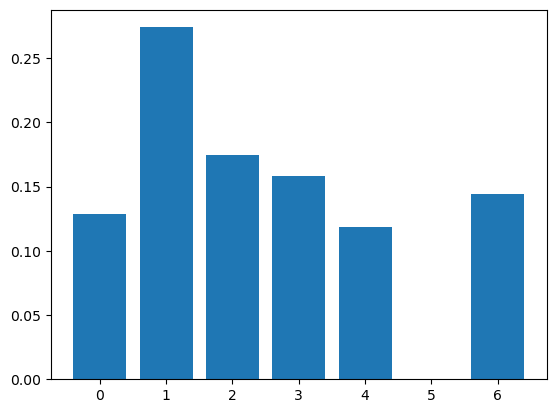

In [32]:
features = clf.feature_importances_

print(features)

plt.bar(x = range(len(features)), height=features)

plt.show()


In [35]:
from sklearn.feature_selection import SelectFromModel

sel = SelectFromModel(clf)

sel.fit(X_train_scaled, y_train)

sel.get_support()

array([False,  True,  True,  True, False, False,  True])

In [36]:
X_selected_train, X_selected_test, y_train, y_test = train_test_split(sel.transform(X), y, random_state=1)

scaler = StandardScaler().fit(X_selected_train)

X_selected_train_scaled = scaler.transform(X_selected_train)

X_selected_test_scaled = scaler.transform(X_selected_test)

C:\Users\prern\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


In [37]:
clf = LogisticRegression().fit(X_train_scaled, y_train)

print(f'Training Score: {clf.score(X_train_scaled, y_train)}')

print(f'Testing Score: {clf.score(X_test_scaled, y_test)}')

Training Score: 0.9942908240473243
Testing Score: 0.9936545604622369


In [38]:
clf = LogisticRegression().fit(X_selected_train_scaled, y_train)

print(f'Training Score: {clf.score(X_selected_train_scaled, y_train)}')

print(f'Testing Score: {clf.score(X_selected_test_scaled, y_test)}')

Training Score: 0.9942908240473243
Testing Score: 0.9936545604622369


In [ ]:
Conclusions
•The dataset does not contain any null values and consists of integers or floats, so minimal data cleansing was 
required before testing.
•The data presents a positive trend which is shown with the use of a histogram.
Logistic Regression Model
•After testing the two models head to head, it's clear that logistic regression presents a higher level of accuracy.
Random Forest Classifier
•When we compare both training and testing scores, it becomes clear that there is not a significant difference 
between the two models.
•The bar chart provides a visual representation of the features. Interestingly, Feature 5 performed the worst while Feature 1 performed significantly better.
Overall
•Both models show signs of positive trends

